<h1><center> South African Language Identification Hack 2022 </h1></center>
<h3><center> EDSA 2201 & 2207 classification hackathon </h2></center>

© Explore Data Science Academy

### Honour Code

I **Roger Arendse**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

---

### Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government



<center><img src="hack_image.jpg" width=1000 height=500 /></center>

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

## Table of contents:

1. [Importing Libraries](#libraries)
2. [Loading Data](#load)
3. [Data Summary](#summary)
4. [Missing Values and Duplicates](#duplicates)
5. [Exploratory Data Analysis (EDA)](#eda)
6. [Preprocessing](#preprocessing)
7. [Modeling](#model)
8. [Kaggle Submission](#kaggle)


---

<a id="libraries"></a>
## 1. Importing Libraries
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [111]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Customise our plotting settings
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
sns.set_style('whitegrid')

In [112]:
# nlp libraries
import spacy
import nltk
import re
import string
from nltk.tokenize import TreebankWordTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

# Downloading the wordnet
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# init spacy
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package wordnet to C:\Users\Roger
[nltk_data]     Arendse\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Roger
[nltk_data]     Arendse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Roger
[nltk_data]     Arendse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [113]:
# model libraries
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

<a name="load"></a>
## 2. Loading Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [114]:
# load files
train_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')
submission_df = pd.read_csv('sample_submission.csv')

<a name="summary"></a>
## 3. Data Summary
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [115]:
# view submission_df
submission_df.head()

,index,lang_id
0,1,tsn
1,2,nbl


In [116]:
# view train_df
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [117]:
# view test_df
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [8]:
# view train_df info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [118]:
# view test_df info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [119]:
# view shape
print('train_df shape: {}'.format(train_df.shape))
print('test_df shape: {}'.format(test_df.shape))
print('submission_df shape: {}'.format(submission_df.shape))

train_df shape: (33000, 2)
test_df shape: (5682, 2)
submission_df shape: (2, 2)


<a name="duplicates"></a>
## 4. Missing Values and Duplicates
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [120]:
# check for missing values in train_df
train_df.isnull().sum()

lang_id    0
text       0
dtype: int64

In [121]:
# check for missing values in test_df
test_df.isnull().sum()

index    0
text     0
dtype: int64

There are no missing values in both train_df and test_df

In [122]:
# check for duplicated rows in train_df
train_df.duplicated().sum()

3052

In [14]:
# check for duplicated rows in test_df
test_df.duplicated().sum()

0

There are 3052 duplicated rows in train_df. To solve this problem I will use a method to remove all duplicated rows 

In [123]:
# remove duplicated rows in train_df
train_df = train_df.drop_duplicates()

In [124]:
# view train_df duplicates and shape
print('train_df duplicates: {}'.format(train_df.duplicated().sum()))
print('train_df shape: {}'.format(train_df.shape))

train_df duplicates: 0
train_df shape: (29948, 2)


<a name="eda"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [125]:
# view train_df 
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [126]:
# view test_df
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [127]:
# view shape of both train_df and test_df 
print('train_df shape: {}'.format(train_df.shape))
print('test_df shape: {}'.format(test_df.shape))

train_df shape: (29948, 2)
test_df shape: (5682, 2)


In [128]:
# view unique values in lang_id column
lang_values = list(train_df.lang_id.unique())
lang_values

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']

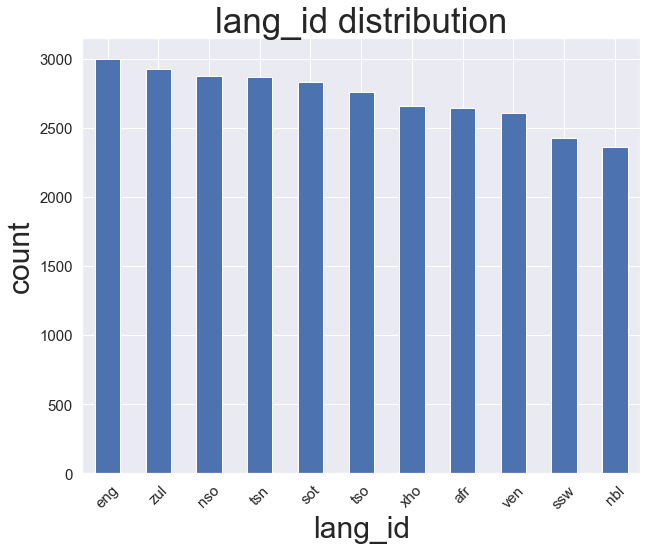

In [129]:
# plot unique values overall distribution 
bargraph = train_df['lang_id'].value_counts()
sns.set()
plt.figure(figsize=(10, 8))
bargraph.plot(kind='bar')
plt.title('lang_id distribution', fontsize=35)
plt.xlabel('lang_id', fontsize=30)
plt.ylabel('count', fontsize=30)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.show()

<a name="preprocessing"></a>
## 6. Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [130]:
# convert text to lowercase in in train_df
train_df['text'] = train_df['text'].str.lower()
train_df.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...


In [131]:
# convert text to lowercase in test_df
test_df['text'] = test_df['text'].str.lower()
test_df.head(3)

,index,text
0,1,"mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu.


In [132]:
# init punctuation
punct = string.punctuation

# Function to remove punctuaation in a message
def remove_punctuation(message):
    output = ''.join([l for l in message if l not in punct])
    return output

In [133]:
# remove punctuation in train_df 
train_df['text'] = train_df['text'].apply(remove_punctuation)
train_df.head(3)

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...


In [134]:
# remove punctuation in test_df 
test_df['text'] = test_df['text'].apply(remove_punctuation)
test_df.head(3)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu


In [136]:
# view non-digit type characters in both train_df and test_df
train = train_df.text.str.count(r'[^a-zA-Z0-9 ]').sum()
test = test_df.text.str.count(r'[^a-zA-Z0-9 ]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 32347
Test count: 4821


In [137]:
# remove non-digit type characters
pattern = r'[^a-zA-Z0-9 ]'
train_df['text'] = train_df['text'].replace(to_replace=pattern, value='', regex=True)
test_df['text'] = test_df['text'].replace(to_replace=pattern, value='', regex=True)

In [138]:
# view non-digit type count in text_3 columns
train = train_df.text.str.count(r'[^a-zA-Z0-9 ]').sum()
test = test_df.text.str.count(r'[^a-zA-Z0-9 ]').sum()

# view count
print('Train count: {}'.format(train))
print('Test count: {}'.format(test))

Train count: 0
Test count: 0


In [139]:
# view train_df 
train_df.head(3)

,lang_id,text
0,xho,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulunatal department of tra...


In [140]:
# view test_df
test_df.head(3)

,index,text
0,1,mmasepala fa maemo a a kgethegileng a letlelel...
1,2,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,tshivhumbeo tshi fana na ngano dza vhathu


<a name="model"></a>
## 7. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [155]:
# feature and labels
X = np.array(train_df["text"])
y = np.array(train_df["lang_id"])

In [156]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [157]:
# init multinomialNB model
multi = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(fit_prior=False))])


In [159]:
# fit model
multi.fit(X_train, y_train)
y_pred = multi.predict(X_test)

# view model performance
print(classification_report(y_test, y_pred))
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred, average='macro')))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       678
         eng       0.99      1.00      1.00       736
         nbl       1.00      0.99      1.00       594
         nso       1.00      1.00      1.00       731
         sot       1.00      1.00      1.00       705
         ssw       1.00      1.00      1.00       626
         tsn       1.00      1.00      1.00       701
         tso       1.00      1.00      1.00       705
         ven       1.00      1.00      1.00       633
         xho       1.00      1.00      1.00       688
         zul       1.00      1.00      1.00       690

    accuracy                           1.00      7487
   macro avg       1.00      1.00      1.00      7487
weighted avg       1.00      1.00      1.00      7487

Accuracy score: 0.9989314812341392
F1 score: 0.9989176771027233


<a name="kaggle"></a>
## 8. Kaggle Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [160]:
# vectorize feature for test_df
X_multi_test = test_df['text']

# prediction 
pred = multi.predict(X_multi_test)

In [161]:
submission = pd.DataFrame({'index': test_df.index+1,
                       'lang_id': pred})
submission.to_csv('Roger_Arendse_Submission_3.csv', index=False)
submission


,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
